In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
mvid = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.1_sgd/data/MVID_101001_171001.txt')
sber = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.1_sgd/data/SBER_101001_171001.txt')

In [ ]:
mvid.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<CLOSE>,<VOL>
0,MVID,D,20101001,0,194.38,19406
1,MVID,D,20101004,0,190.00,31039
2,MVID,D,20101005,0,187.00,17651
3,MVID,D,20101006,0,190.04,36482
4,MVID,D,20101007,0,199.85,204248


In [ ]:
sber.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<CLOSE>,<VOL>
0,SBER,D,20101001,0,89.09,332429890
1,SBER,D,20101004,0,89.88,194032721
2,SBER,D,20101005,0,91.97,198775753
3,SBER,D,20101006,0,91.20,210406027
4,SBER,D,20101007,0,90.40,145137617


In [ ]:
mvid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1758 entries, 0 to 1757
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   <TICKER>  1758 non-null   object 
 1   <PER>     1758 non-null   object 
 2   <DATE>    1758 non-null   int64  
 3   <TIME>    1758 non-null   int64  
 4   <CLOSE>   1758 non-null   float64
 5   <VOL>     1758 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 82.5+ KB


In [ ]:
sber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1758 entries, 0 to 1757
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   <TICKER>  1758 non-null   object 
 1   <PER>     1758 non-null   object 
 2   <DATE>    1758 non-null   int64  
 3   <TIME>    1758 non-null   int64  
 4   <CLOSE>   1758 non-null   float64
 5   <VOL>     1758 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 82.5+ KB


In [ ]:
result = pd.merge(sber, mvid, on='<DATE>')

In [ ]:
result

,<TICKER>_x,<PER>_x,<DATE>,<TIME>_x,<CLOSE>_x,<VOL>_x,<TICKER>_y,<PER>_y,<TIME>_y,<CLOSE>_y,<VOL>_y
0,SBER,D,20101001,0,89.09,332429890,MVID,D,0,194.38,19406
1,SBER,D,20101004,0,89.88,194032721,MVID,D,0,190.00,31039
2,SBER,D,20101005,0,91.97,198775753,MVID,D,0,187.00,17651
3,SBER,D,20101006,0,91.20,210406027,MVID,D,0,190.04,36482
4,SBER,D,20101007,0,90.40,145137617,MVID,D,0,199.85,204248
...,...,...,...,...,...,...,...,...,...,...,...
1753,SBER,D,20170926,0,192.54,82022480,MVID,D,0,425.00,73570
1754,SBER,D,20170927,0,193.70,54969700,MVID,D,0,424.10,77680
1755,SBER,D,20170928,0,191.96,39061930,MVID,D,0,423.10,75540
1756,SBER,D,20170929,0,192.33,26264260,MVID,D,0,416.10,90430


In [ ]:
x = result['<CLOSE>_x']
y = result['<CLOSE>_y']

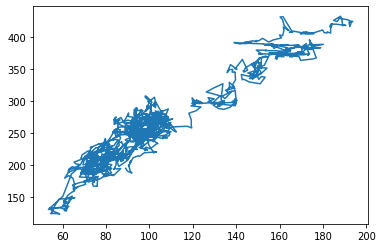

In [ ]:
plt.plot(x,y)

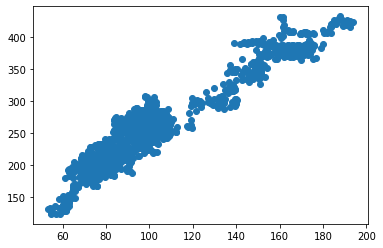

In [ ]:
plt.scatter(x,y)

In [ ]:
class Model:
  def __init__(self):
    self.b0 = 0
    self.b1 = 0
  def predict(self, x):
    return self.b0 + self.b1 * x
  #функция ошибки
  #m len(y) - количество точек
  def error(self, x, y):
    return sum((self.predict(x) - y) ** 2 ) / (2 * len(y))
  #Для градиентного спуска
  def fit(self, x, y):
    alpha = 1
    steps = []
    errors = []

    for i in range(1000):
      errors.append(self.error(x,y))
      steps.append(i)
      
      dj0 = sum(self.predict(x) - y) / len(y)
      dj1 = sum((self.predict(x) - y)* x)/ len(y)
      self.b0 -= dj0 * alpha
      self.b1 -= dj1 * alpha

      if self.error(x,y)> errors[-1]:
        alpha = alpha/10

    print('alpha=', alpha)
    return steps, errors

alpha= 0.0001


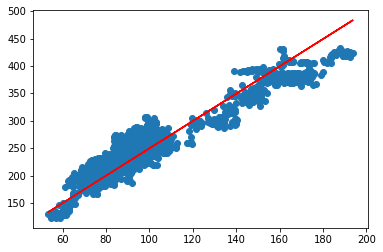

In [ ]:
model = Model()
# кривая обучения
steps, errors = model.fit(x,y)

plt.scatter(x,y)
plt.plot(x, model.predict(x), color = 'r')

alpha= 0.0001
296.8067070010223


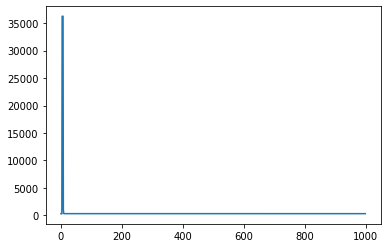

In [ ]:
steps, errors = model.fit(x,y)
print(model.error(x,y))

plt.plot(steps, errors)

Задание 2. Постройте модель регрессии на другой паре инструментов.

In [ ]:
yandex = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.1_sgd/data/YNDX_101001_171001.txt')
D_J = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.1_sgd/data/D_J-IND_101001_171001.txt')

In [ ]:
regress_2 = pd.merge(D_J, yandex, on = '<DATE>')
regress_2.head()

,<TICKER>_x,<PER>_x,<DATE>,<TIME>_x,<CLOSE>_x,<VOL>_x,<TICKER>_y,<PER>_y,<TIME>_y,<CLOSE>_y,<VOL>_y
0,D&J-IND,D,20140604,0,16737.53,0,YNDX,D,0,1170.0,35146
1,D&J-IND,D,20140605,0,16836.11,0,YNDX,D,0,1145.1,24973
2,D&J-IND,D,20140606,0,16924.28,0,YNDX,D,0,1163.0,7889
3,D&J-IND,D,20140609,0,16943.10,0,YNDX,D,0,1172.1,7304
4,D&J-IND,D,20140610,0,16945.92,0,YNDX,D,0,1170.0,3207


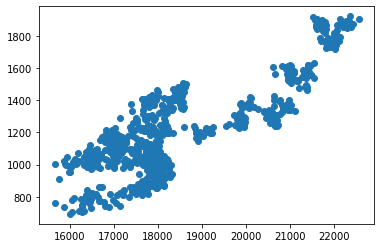

In [ ]:
x1 = regress_2['<CLOSE>_x']
y1 = regress_2['<CLOSE>_y']
plt.scatter(x1,y1)

alpha= 1.0000000000000003e-09


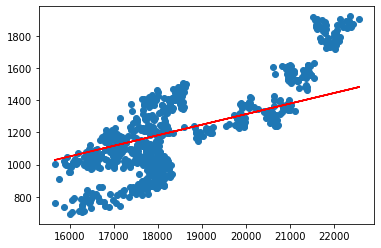

In [ ]:
model = Model()
steps, errors = model.fit(x1,y1)

plt.scatter(x1,y1)
plt.plot(x1, model.predict(x1), color = 'r')

alpha= 1.0000000000000003e-09
18164.985429366523


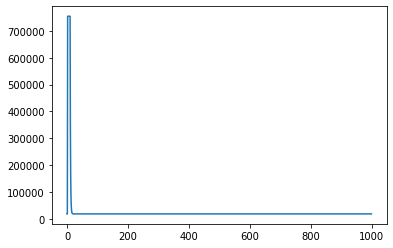

In [ ]:
steps, errors = model.fit(x1,y1)
print(model.error(x1,y1))

plt.plot(steps, errors)

Научиться использовать библиотеку sklearn для построения парной линейной регрессии


1.   Изучить официальную документацию библиотеки sklearn: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
2.   По примеру программы регрессии, рассмотренной на семинаре, построить модель регрессии с использованием библиотечных средств
3. Сравнить результаты регрессии с использованием библиотечной функции и написанной самостоятельно.




Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


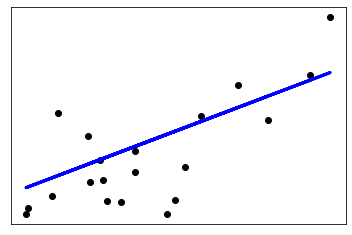

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets



# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()